# Timing

In [1]:
import math
import numpy as np
from packages.old_fmm import *
import packages.general as general

In [2]:
# storage lists

particle_numbers = np.logspace(1, 7, 25, dtype=int)
pairwise_times = []
fmm_times = []

precision = 5

In [3]:
# standard pairwise

for num in particle_numbers:
    particles = [general.Particle() for _ in range(num)]
    print(f'Num: {num}')
    time = %timeit -o general.direct_particle_potentials(particles)
    pairwise_times.append(time)
    if time.average > 20:
        break

Num: 10
47.7 µs ± 2.48 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Num: 17
135 µs ± 2.27 µs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Num: 31
448 µs ± 498 ns per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Num: 56
1.49 ms ± 27.3 µs per loop (mean ± std. dev. of 7 runs, 1,000 loops each)
Num: 100
4.72 ms ± 9.05 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Num: 177
15.7 ms ± 262 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Num: 316
49.6 ms ± 283 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
Num: 562
157 ms ± 1.28 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Num: 1000
500 ms ± 2.11 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Num: 1778
1.59 s ± 18.2 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Num: 3162
5.02 s ± 19.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Num: 5623
15.9 s ± 22.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
Num: 10000
50.3 s ± 69.7 ms per loop (mean

In [2]:
# fmm

def do_fmm(precision, max_level, particles, expansion_arrays):
    for particle in particles:
        particle.potential = 0.0
    
    for level in range(len(expansion_arrays)):
        expansion_arrays[level][:,:,1:] = 0
    finest_particles = insert_particles(precision, max_level, particles, expansion_arrays[max_level])
    upward_pass(precision, expansion_arrays)
    downward_pass(precision, expansion_arrays)
    evaluate_particle_potentials(precision, max_level, finest_particles, expansion_arrays[max_level])


for num in particle_numbers:
    particles = [Particle() for _ in range(num)]
    max_level = int(0.5 * math.log2(num))
    expansion_arrays = create_expansion_arrays(precision, max_level)

    print(f'Num: {num}, Max_level: {max_level}')
    time = %timeit -o do_fmm(precision, max_level, particles, expansion_arrays)
    fmm_times.append(time)
    if time.average > 100:
        break

NameError: name 'particle_numbers' is not defined

In [5]:
pairwise_average = [time.average for time in pairwise_times]
pairwise_stdev = [time.stdev for time in pairwise_times]
fmm_average = [time.average for time in fmm_times]
fmm_stdev = [time.stdev for time in fmm_times]

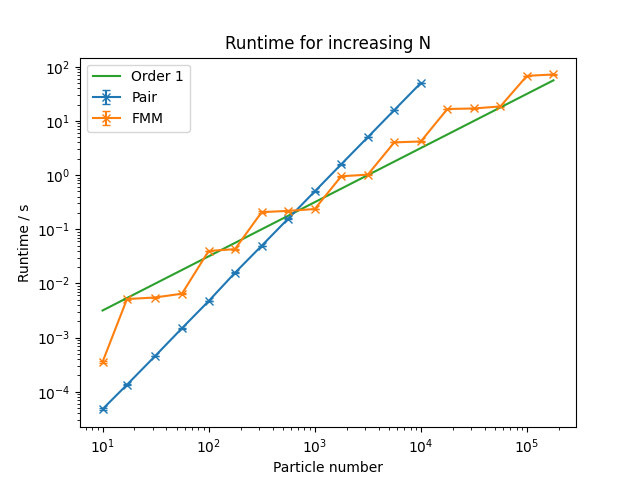

In [15]:
import matplotlib.pyplot as plt
%matplotlib widget

fig, ax = plt.subplots()

ax.errorbar(particle_numbers[:len(pairwise_average)], pairwise_average, yerr=pairwise_stdev, fmt='x-', capsize=3, label='Pair')
ax.errorbar(particle_numbers[:len(fmm_average)], fmm_average, yerr=fmm_stdev, fmt='x-', capsize=3, label='FMM')

ax.plot(particle_numbers[:len(fmm_average)], (particle_numbers[:len(fmm_average)]**1) * 10**-3.5, label='Order 1')
# ax.set_aspect('equal')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_xlabel("Particle number")
ax.set_ylabel("Runtime / s")
ax.set_title("Runtime for increasing N")
ax.legend()

plt.show()

# Errors

In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

from packages.old_fmm.class_tools.fmm import FMM
import packages.general as general
import packages.old_fmm as old_fmm

%matplotlib widget

In [ ]:
from packages.old_fmm.class_tools.cell import Cell

index = (2,3)
level = 2
cell = Cell(index[0], index[1], level)

old_fmm.tools.coord.interaction_list(index, level), \
cell.interaction_list()

In [2]:
precision = 4
num_particles = 20

particles = [general.Particle() for _ in range(num_particles)]

max_level = int(0.5 * math.log2(num_particles))

fmm_method = FMM(precision, max_level, particles)
fmm_method.do_fmm(zero_potentials=True)

In [3]:
expansion_arrays = old_fmm.create_expansion_arrays(precision, max_level)
old_fmm.do_fmm(precision, particles, expansion_arrays, zero_potentials=True)

In [6]:
old_finest = expansion_arrays[-1]
new_finest = fmm_method.finest_level.array

expansion_arrays[-1][:,:,:] - fmm_method.levels[-1].array[:,:,:] < 1e-14

array([[[ True,  True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True]],

       [[ True,  True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True]],

       [[ True,  True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  True,  True,  True,  True]],

       [[ True,  True,  True,  True,  True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True,  

In [3]:
fmm_method.do_fmm(zero_potentials=True)
general.direct_particle_potentials(particles, zero_potentials=True)

fmm_pot = np.array([particle.potential for particle in particles])
dir_pot = np.array([particle.direct_potential for particle in particles])

Upward on level: Level: 3
Upward on level: Level: 2
Upward on level: Level: 1
Upward on level: Level: 0
Downward on level: Level: 2
Downward on level: Level: 3
Finest Downward on level: FinestLevel: 4


In [4]:
difference = fmm_pot - dir_pot
fractional_error = difference / dir_pot
percent_error = 100*fractional_error

In [5]:
print(np.max(percent_error))

20215.216107334254


In [5]:
precisions = [4,6,10,20]

num_particles = 1000
particles = [general.Particle() for _ in range(num_particles)]
max_level = int(0.5 * math.log2(num_particles))

fractionals = []

general.direct_particle_potentials(particles, zero_potentials=True)
dir_pot = np.array([particle.direct_potential for particle in particles])

for precision in precisions:
    expansion_arrays = old_fmm.create_expansion_arrays(precision, max_level)

    old_fmm.do_fmm(precision, particles, expansion_arrays, zero_potentials=True)

    fmm_pot = np.array([particle.potential for particle in particles])

    difference = fmm_pot - dir_pot
    fractionals.append(difference / dir_pot)

NameError: name 'fmm' is not defined

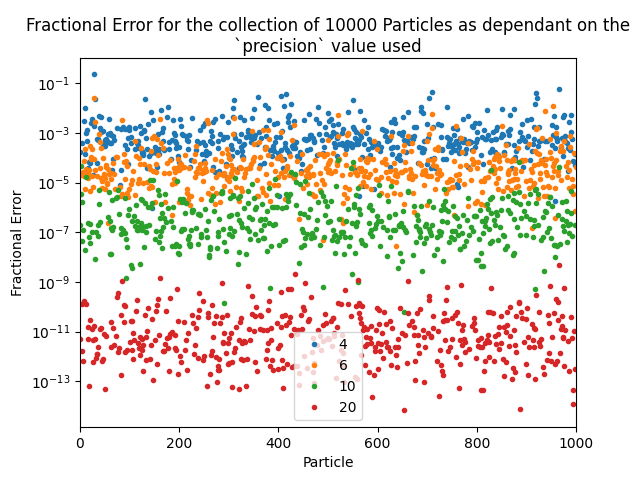

In [16]:
fig, ax = plt.subplots()
for i, precision in enumerate(precisions):
    ax.plot(fractionals[i], '.', label=str(precision))
ax.set_yscale('log')
ax.set_xmargin(0)
ax.set_xticks(np.linspace(0,num_particles, 6))
ax.set_xlabel('Particle')
ax.set_ylabel('Fractional Error')
ax.set_title('Fractional Error for the collection of 10000 Particles as dependant on the `precision` value used', wrap=True)
ax.legend()

plt.show()

# Forces

In [2]:
import math
import numpy as np

import packages

In [3]:
from importlib import reload
reload(packages)

<module 'packages' from '/Users/liambrown/repositories/computing-project-lb880/packages/__init__.py'>

In [4]:
precision = 20
num_particles = 1000

particles = [packages.general.Particle() for _ in range(num_particles)]

max_level = int(0.5 * math.log2(num_particles))

expansion_arrays = packages.old_fmm.create_expansion_arrays(precision, max_level)

In [5]:
packages.general.direct_particle_forces(particles, zero_forces=True)
dir_forces = np.array([particle.direct_force for particle in particles])

In [6]:
precisions = [4,6,10,20]
precisions_errors = []

for precision in precisions:
    expansion_arrays = packages.old_fmm.create_expansion_arrays(precision, max_level)
    packages.old_fmm.do_fmm(precision, particles, expansion_arrays, zero_potentials=True, zero_forces=True)

    fmm_forces = np.array([particle.force for particle in particles])
    difference = fmm_forces - dir_forces
    abs_fracs = np.abs(difference / dir_forces)
    mag_fracs = np.linalg.norm(abs_fracs, axis=1)
    precisions_errors.append(mag_fracs)


In [7]:
np.max([particle.potential for particle in particles])

18.133450832311887

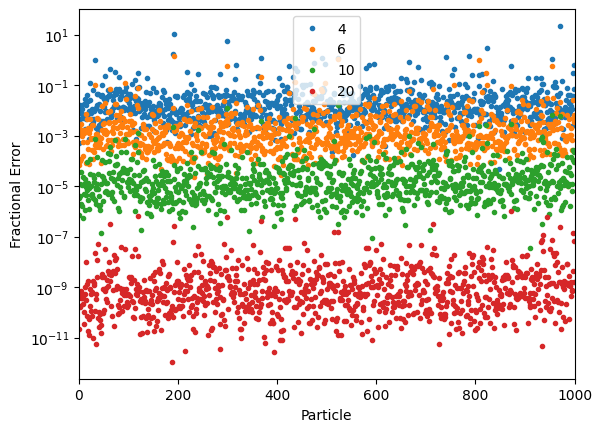

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

for i, precision in enumerate(precisions):
    ax.plot(precisions_errors[i], '.', label=str(precision))

ax.set_yscale('log')
ax.set_xmargin(0)
ax.set_xticks(np.linspace(0,num_particles, 6))
ax.set_xlabel('Particle')
ax.set_ylabel('Fractional Error')
ax.legend()

plt.show()

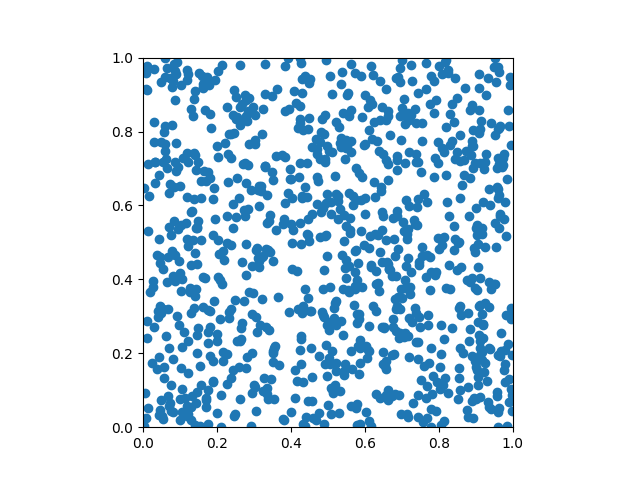

In [7]:
import matplotlib.pyplot as plt

X = [particle.centre.real for particle in particles]
Y = [particle.centre.imag for particle in particles]
# ticks = np.arange(0,1,2*expansion_arrays[max_level][0,0,0].real)

fig, ax = plt.subplots()
ax.plot(X,Y, 'o')
ax.set_aspect('equal')
ax.set_xlim(0,1)
ax.set_ylim(0,1)
# ax.set_xticks(ticks, minor=True)
# ax.set_yticks(ticks, minor=True)
ax.grid(True, 'minor')
plt.show()